**Read the processed dataset**

In [9]:
proc_dateset2 = pd.read_csv('Processes-dataset.csv')

proc_dateset2.drop(proc_dateset2.columns[0], axis=1, inplace=True)

proc_dateset2

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,1
1,wonderful little production br br film techniq...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49571,think movie right good job creative original f...,1
49572,bad plot bad dialogue bad acting idiotic direc...,0
49573,catholic teach parochial elementary school nun...,0
49574,go disagree previous comment side maltin one s...,0


In [10]:
proc_dateset3 = proc_dateset2.iloc[0:15000]
proc_dateset3

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,1
1,wonderful little production br br film techniq...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
14995,never understood appeal garbo always come acro...,0
14996,entirely bad movie plot new house build next d...,0
14997,big md fan call like see film limp along plot ...,0
14998,pure crap probably bad biblical theme film eve...,0


**Split data to train, test and validate**

In [11]:
x, x_test, y, y_test = train_test_split(
    proc_dateset3['review'],
    proc_dateset3['sentiment'],
    test_size=0.2,
    random_state= 42
)

In [12]:
x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state= 42
)

**Get number of rows for each subset**

In [13]:
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

8040
3960
3000


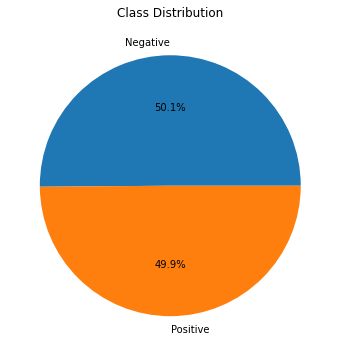

In [14]:
# Map the numerical labels to corresponding categories
classes = {0: 'Negative', 1: 'Positive'}

labels_description = np.array([classes[label] for label in y_train])

# Count the occurrences of each class in the 'labels_description' array
class_counts = np.unique(labels_description, return_counts=True)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(class_counts[1], labels=class_counts[0], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

**Encode text using tfidf**

In [15]:
# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the train data
tf_x_train = tfidf_vectorizer.fit_transform(x_train)

In [16]:
print('Number of features is:\n',tfidf_vectorizer.get_feature_names_out().shape)

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [17]:
# Transform validation and test data
tf_x_val = tfidf_vectorizer.transform(x_val)
tf_x_test = tfidf_vectorizer.transform(x_test)

## <font color='orange'> ***Train models***</font>

In [31]:
from itertools import product

param_grid = {
    'C': [1, 2, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 1.0],
}

# Generate all possible combinations
all_param_combinations = list(product(*param_grid.values()))

# Convert combinations to a list of dictionaries
param_sets = [dict(zip(param_grid.keys(), values)) for values in all_param_combinations]

# Example usage:
for idx, params in enumerate(param_sets):
    print(f"Parameter Set {idx + 1}: {params}")

Parameter Set 1: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 0.0}
Parameter Set 2: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'coef0': 1.0}
Parameter Set 3: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 0.0}
Parameter Set 4: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'coef0': 1.0}
Parameter Set 5: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 0.0}
Parameter Set 6: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'coef0': 1.0}
Parameter Set 7: {'C': 1, 'kernel': 'linear', 'gamma': 1, 'degree': 2, 'coef0': 0.0}
Parameter Set 8: {'C': 1, 'kernel': 'linear', 'gamma': 1, 'degree': 2, 'coef0': 1.0}
Parameter Set 9: {'C': 1, 'kernel': 'linear', 'gamma': 1, 'degree': 3, 'coef0': 0.0}
Parameter Set 10: {'C': 1, 'kernel': 'linear', 'gamma': 1, 'degree': 3, 'coef0': 1.0}
Parameter Set 11: {'C': 1, 'kernel': 'linear', 'gamma': 1, 'degree': 4, 'coef0': 0.0}
Parameter Set 12: {'C': 1, 

In [23]:
def evaluate_model(clf,param_set, x_train, y_train, x_val, y_val):
    clf.set_params(**param_set)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)

    print(clf.__class__.__name__)
    print('Accuracy of training', acc_train)
    print('Accuracy of validation', acc_val)
    print('--------------------------')
    return acc_train, acc_val , param_set

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [25]:
# List to store models, hyperparameters, and accuracies
model_list = []

# Example usage:
for idx, params in enumerate(param_sets):
    # Create a new SVC model with the current parameter set
    current_model = SVC(**params)

    # Call the evaluate_model function with the current model and parameter set
    acc_train, acc_val, best_params = evaluate_model(current_model, params, tf_x_train, y_train, tf_x_val, y_val)

    # Append the model, its parameters, and accuracy to the list
    model_list.append({'model': current_model, 'params': best_params, 'acc_val': acc_val, 'acc_train': acc_train})

# Find the model with the highest validation accuracy
best_model_info = max(model_list, key=lambda x: x['acc_val'])

# Access the best model and its information
best_model = best_model_info['model']
best_params = best_model_info['params']
best_acc_val = best_model_info['acc_val']
best_acc_train = best_model_info['acc_train']

print("Best Model Hyperparameters:", best_params)
print("Best Model Accuracy on Validation Set:", best_acc_val)
print("Best Model Accuracy on Training Set:", best_acc_train)

SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
--------------------------
SVC
Accuracy of training 0.9743781094527363
Accuracy of validation 0.8654040404040404
----------

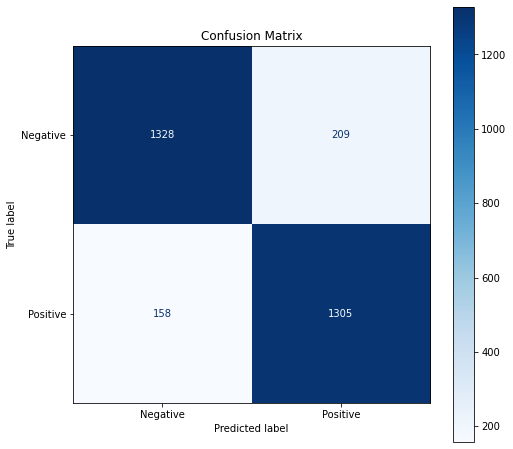

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix_for_best_model(best_model, tf_x_test, y_test):
    # Predict on validation data using the best model
    y_pred_val = best_model.predict(tf_x_test)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = plot_confusion_matrix(best_model, tf_x_test, y_test, cmap=plt.cm.Blues, ax=ax, display_labels=["Negative", "Positive"])
    disp.ax_.set_title("Confusion Matrix")

    plt.show()

# Example usage:
# Assuming 'best_model' is the best model you obtained from the hyperparameter tuning process
# Replace 'X_val' and 'y_val' with your actual validation data
plot_confusion_matrix_for_best_model(best_model, tf_x_test, y_test)


In [29]:
import joblib

joblib.dump(best_model, 'best_model.pkl')

# Load the model from the file
loaded_model = joblib.load('best_model.pkl')